In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from squidpy.pl._utils import save_fig

sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
sc.settings.dpi = 300
sq.__version__
sc.settings.figdir = "./figures"

%load_ext autoreload
%autoreload 2


/Users/giovanni.palla/miniconda3/envs/spatial/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


scanpy==1.7.0rc2.dev25+g56303580.d20210212 anndata==0.7.4 umap==0.4.6 numpy==1.19.4 scipy==1.5.2 pandas==1.1.4 scikit-learn==0.24.1 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2


In [2]:
adata = sq.datasets.visium_hne_adata()

In [3]:
sq.gr.spatial_neighbors(adata)

Creating graph using `visium` coordinates and `None` transform
Adding `adata.obsp['spatial_connectivities']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [4]:
# sq.gr.moran(adata, n_jobs=6)

In [5]:
fig, ax = plt.subplots(
    figsize=(3, 5),
)
g = "cluster"  # ["Nrgn", "Camk2n1", "Mobp", "cluster"]
sc.pl.spatial(
    adata,
    color=g,
    save=f"_moran_{g}.png",
    ax=ax,
    #     legend_loc=False,
    show=False,
)

In [5]:
sq.gr.ligrec(
    adata,
    cluster_key="cluster",
)

Fetching interactions from `omnipath`
Fetched `7607` interactions
    Finish (0:00:02)
Running `1000` permutations on `2080` interactions and `225` cluster combinations using `1` core(s)


Adding `adata.uns['cluster_ligrec']`
Finish (0:00:27)


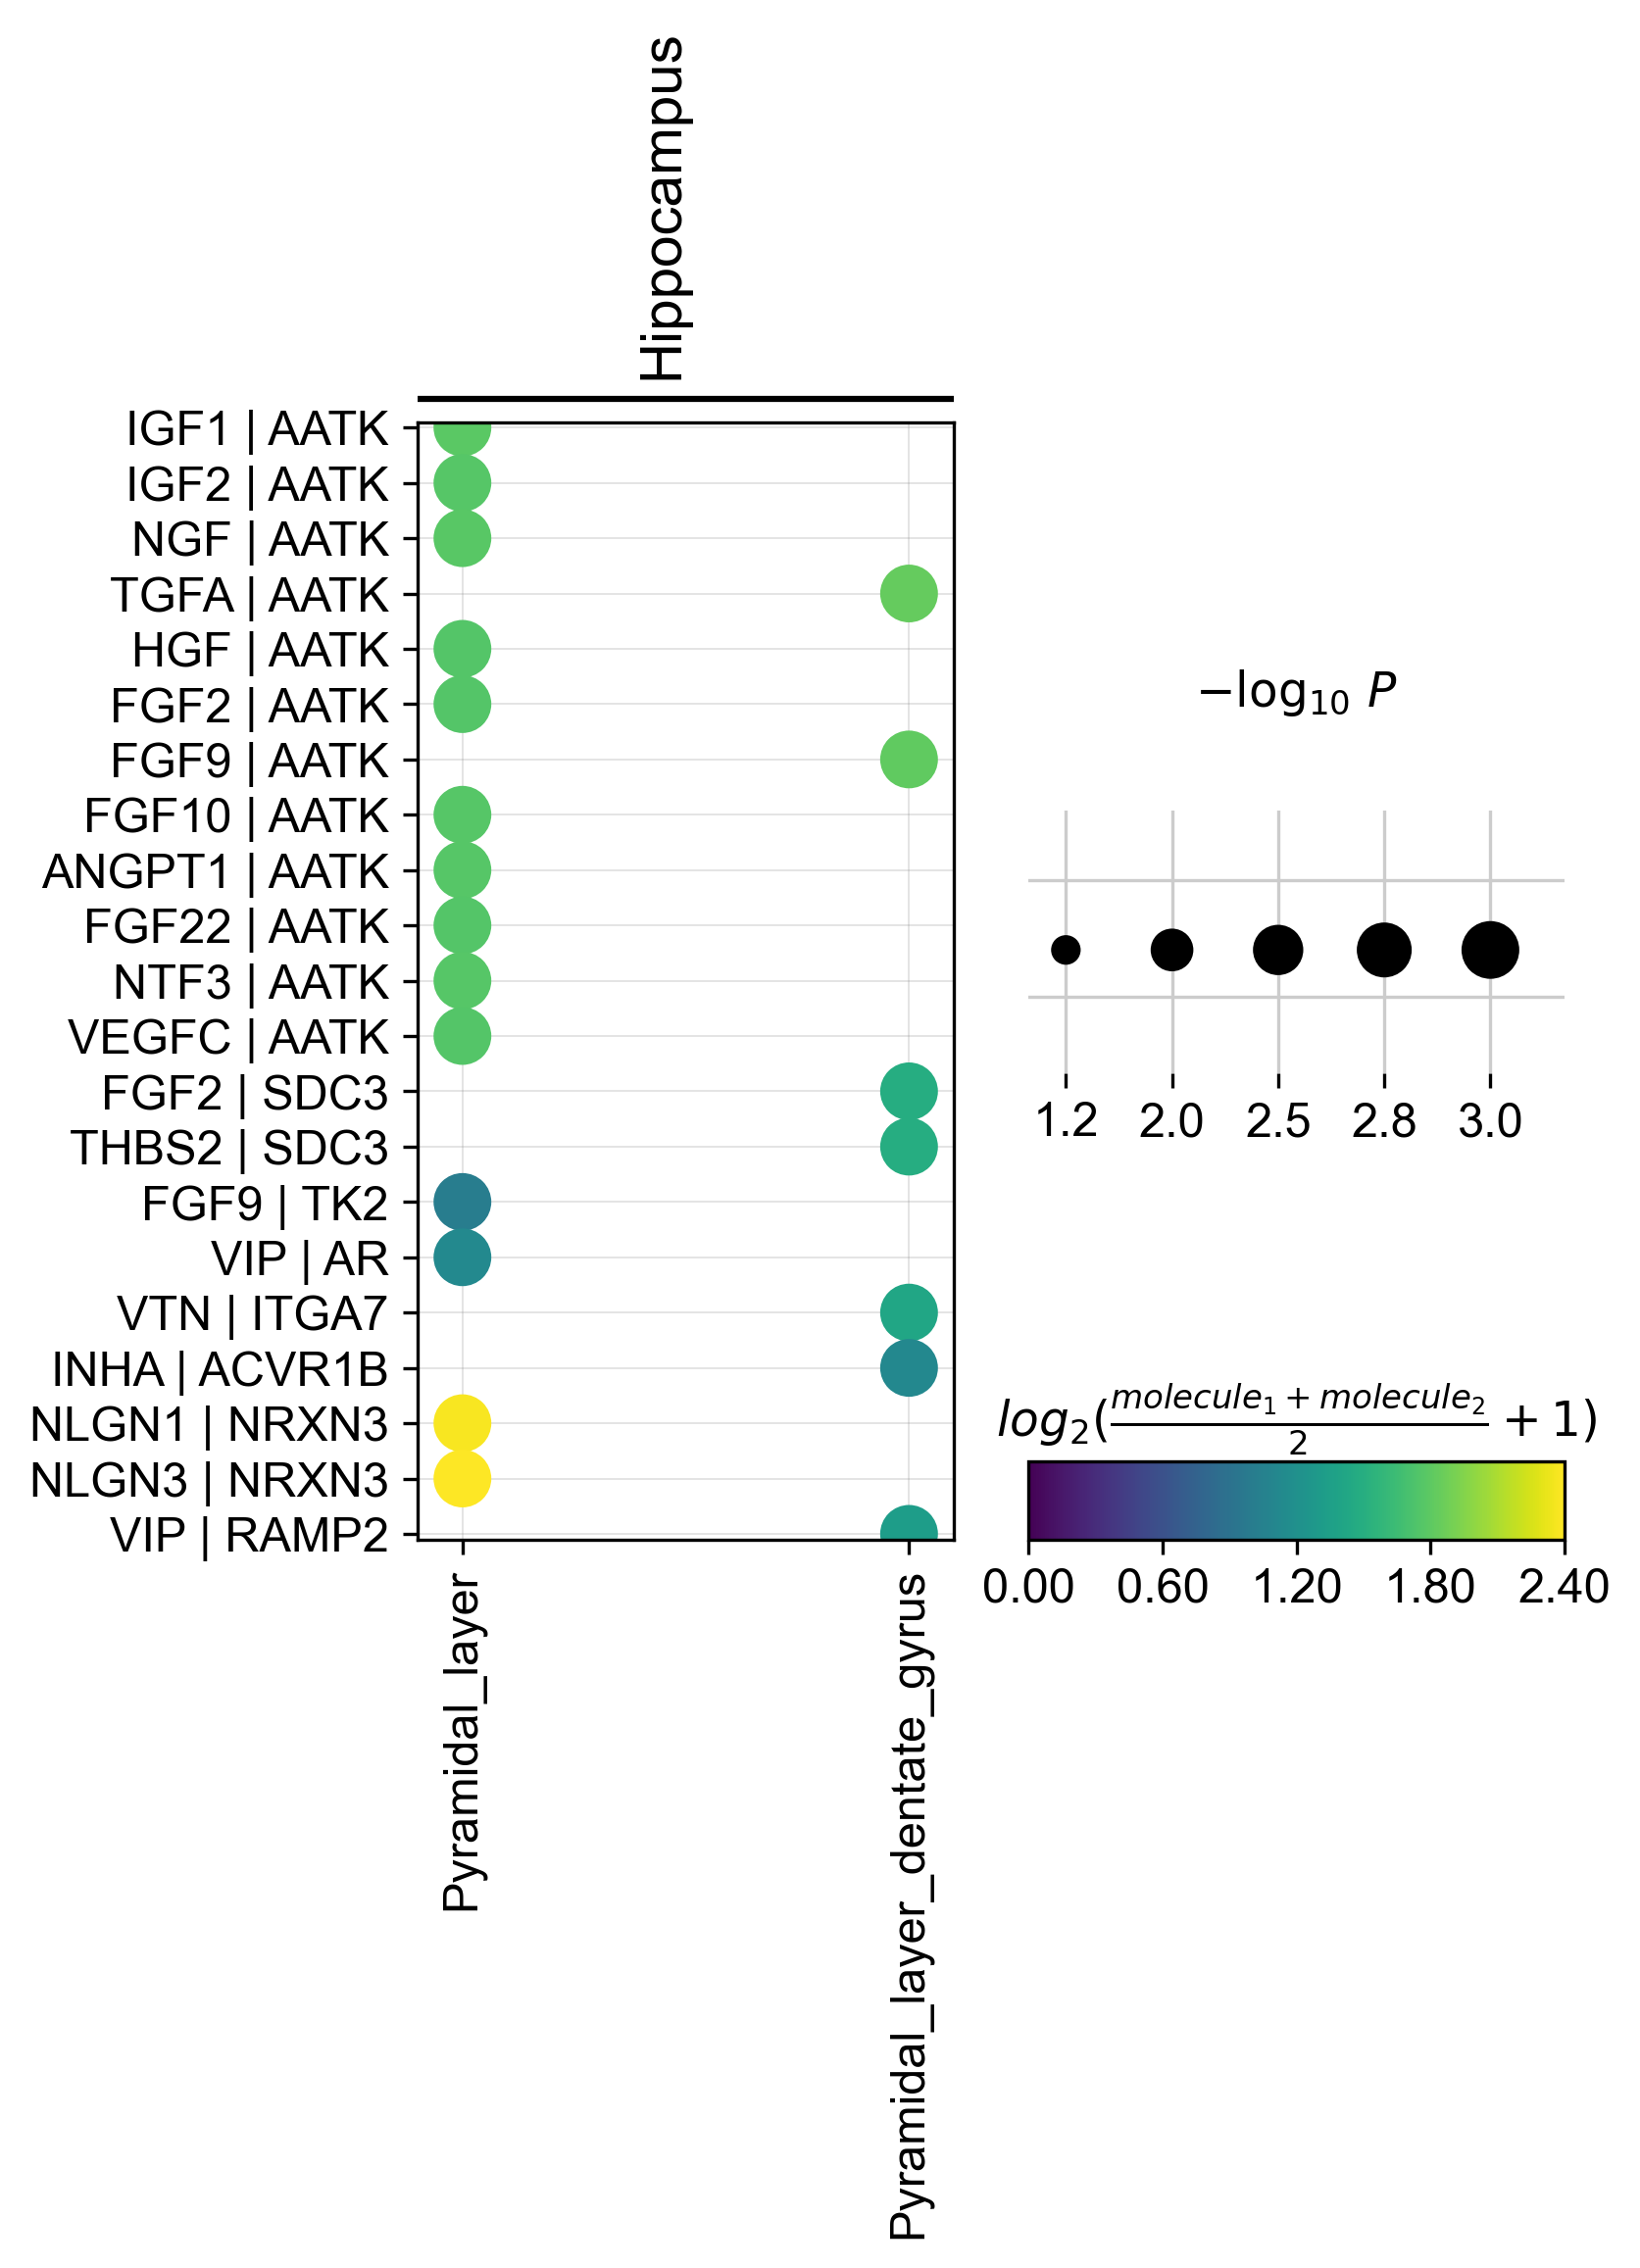

In [65]:
sq.pl.ligrec(
    adata,
    cluster_key="cluster",
    source_groups="Hippocampus",
    target_groups=["Pyramidal_layer", "Pyramidal_layer_dentate_gyrus"],
    means_range=(1, np.inf),
    pvalue_threshold=0.001,
    alpha=0.00001,
    swap_axes=False,
    dpi=300,
    title="",
    figsize=(5, 5),
    y_padding=0.1,
    x_padding=0.1,
    width=2.5,
    height=0.5,
    save="ligrec_visium.png",
)